Importing Libraries


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
sns.set()
warnings.filterwarnings("ignore")


**General Statistics**

# **1. Train Data**

In [ ]:
#Read train data
train_data = pd.read_csv('/content/drive/MyDrive/KKbox_data/train_v2.csv')


In [ ]:
train_data.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [ ]:
train_data.describe()

,is_churn
count,970960.000000
mean,0.089942
std,0.286099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      970960 non-null  object
 1   is_churn  970960 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


To check the distribution of all members who churned and who did not churn, lets plot **total count** vs **is_churn** 

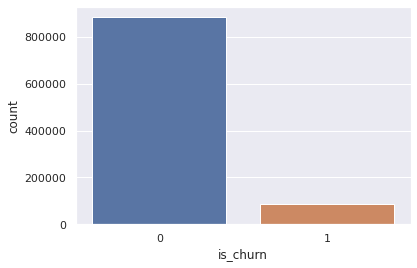

In [ ]:
sns.countplot(train_data['is_churn'])
plt.show()

**Though it is good to have positive points(members who did not churn) for any business, our data is imbalanced**

In [ ]:
train_data[train_data['is_churn'].isnull()]

,msno,is_churn


**There are no null values in train dataset**

Similarly, we find basic stats about transaction, member data and userlogs

# **2. Members data**

In [ ]:
#Read members data
members = pd.read_csv('/content/drive/MyDrive/KKbox_data/members_v3.csv',parse_dates=['registration_init_time'])

In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15



*   There are NaN Values in gender
*   Gender is in string format, need to be encoded


 

In [ ]:
members.describe()

,city,bd,registered_via
count,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00
std,5.478359e+00,1.792590e+01,2.361398e+00
min,1.000000e+00,-7.168000e+03,-1.000000e+00
25%,1.000000e+00,0.000000e+00,4.000000e+00
50%,1.000000e+00,0.000000e+00,4.000000e+00
75%,4.000000e+00,2.100000e+01,7.000000e+00
max,2.200000e+01,2.016000e+03,1.900000e+01


In [ ]:
members.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,city,bd,registered_via
count,6769473.000000,6769473.000000,6769473.000000
mean,3.847358,9.795794,5.253069
std,5.478359,17.925900,2.361398
min,1.000000,-7168.000000,-1.000000
25%,1.000000,0.000000,4.000000
50%,1.000000,0.000000,4.000000
75%,4.000000,21.000000,7.000000
max,22.000000,2016.000000,19.000000


In [ ]:
pd.DataFrame({'%MissingValues':round((members.isna().sum()/members.shape[0])*100,2)}) # To find the missing values in any fields

,%MissingValues
msno,0.00
city,0.00
bd,0.00
gender,65.43
registered_via,0.00
registration_init_time,0.00


**Around 65% of missing values are present in Gender**

***bd implies age, which clearly shows that some values are negative and some values are very high which means outliers are present**

In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   city                    int64         
 2   bd                      int64         
 3   gender                  object        
 4   registered_via          int64         
 5   registration_init_time  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 309.9+ MB


In [ ]:
members.shape

(6769473, 6)

***>>> Now, lets explore the members dataset in depth***

**To check the number of distinct cities**

In [ ]:
print(members['city'].value_counts())
print('Total number of distinct cities ', members['city'].nunique())

1     4804326
5      385069
13     320978
4      246848
22     210407
15     190213
6      135200
14      89940
12      66843
9       47639
11      47489
8       45975
18      38039
10      32482
21      30837
17      27772
3       27282
7       11610
16       5092
20       4233
19       1199
Name: city, dtype: int64
Total number of distinct cities  21


***Now, lets plot the distribution of users from different ciites***

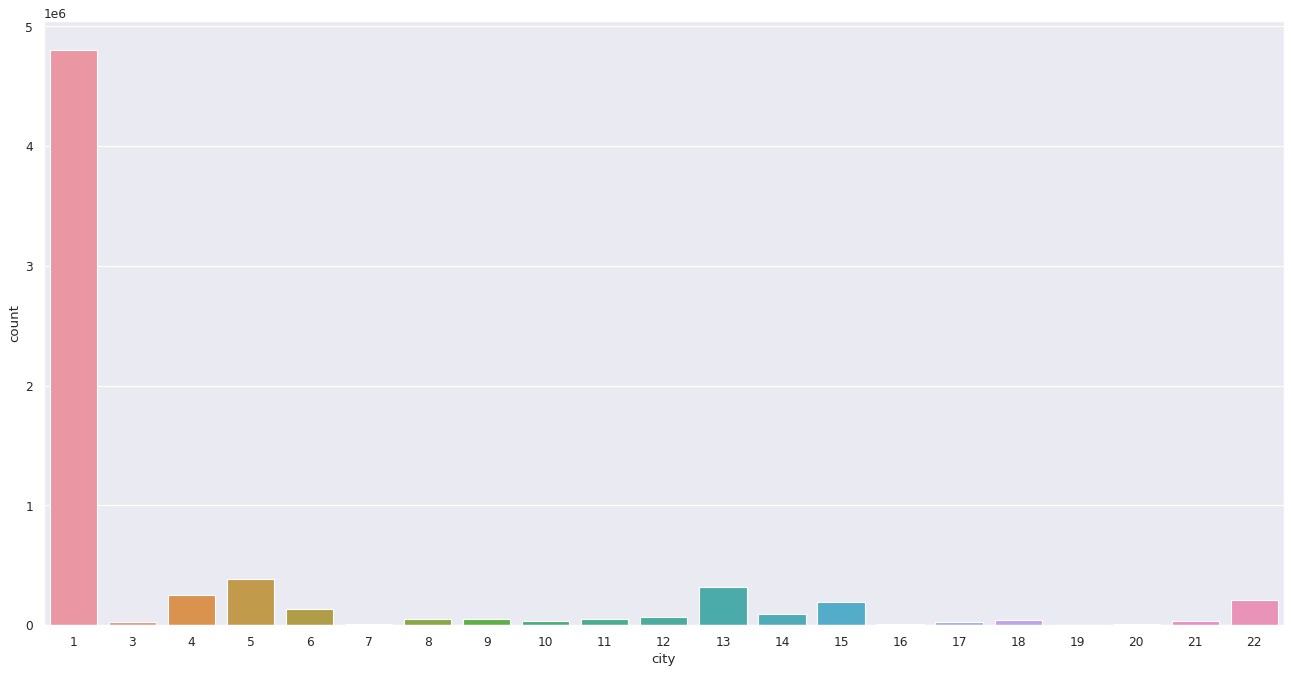

In [ ]:
#Distribution of users from different cities
figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(members['city'])
plt.show()

**Clearly, we can see city 1 is dominant here!**

***Now, Lets plot some more charts to understand the distribution of Age groups, genders, and methods of registration against the user count***

<function matplotlib.pyplot.show>

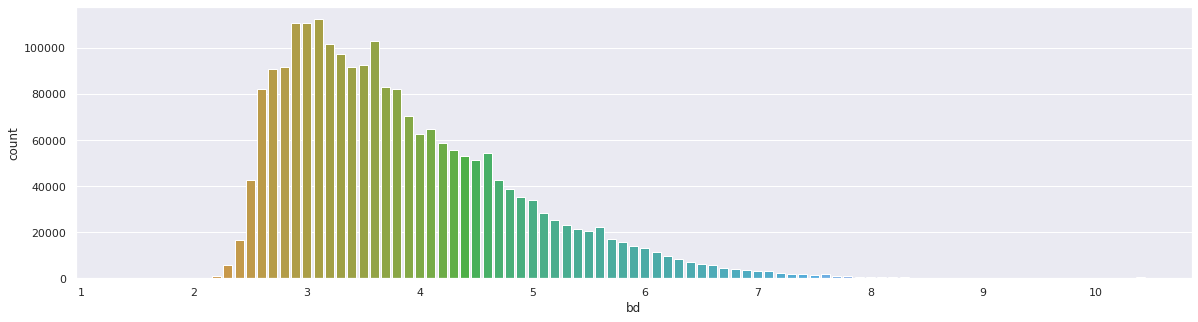

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(members['bd'][members['bd']>0][ members['bd']<100])  # to remove outliers and filter the age group between 0 to 100
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,120000,20000))
plt.show

**Clearly, we can see that most of the users belong to age group between 20-70, youngsters are high in number**

<function matplotlib.pyplot.show>

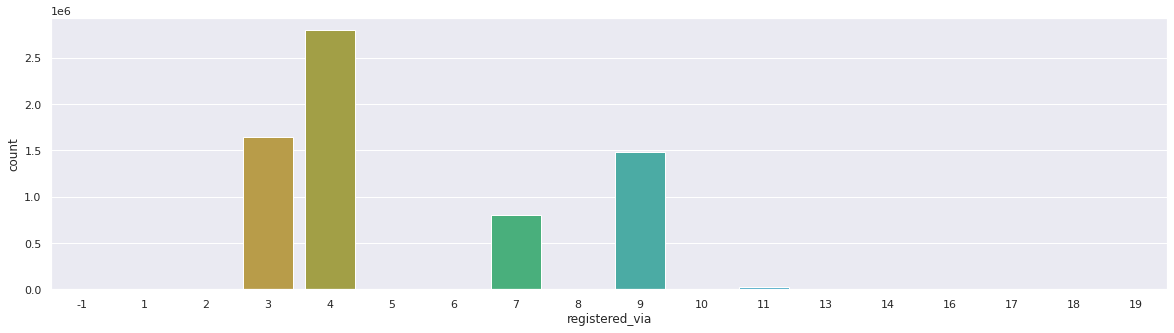

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(members['registered_via'])             # count of registered via
plt.show

In [ ]:
members['registered_via'].value_counts()
print('Total number of distinct registration methods',members['registered_via'].nunique())

Total number of distinct registration methods 18


**Here, methods 3,4,7,9 are mostly preferred by the users**

<function matplotlib.pyplot.show>

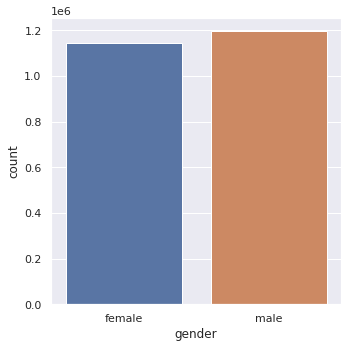

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(members['gender'])                    # count of gender
plt.tight_layout()
plt.show

**Gender distribution is almost same for both men and women**

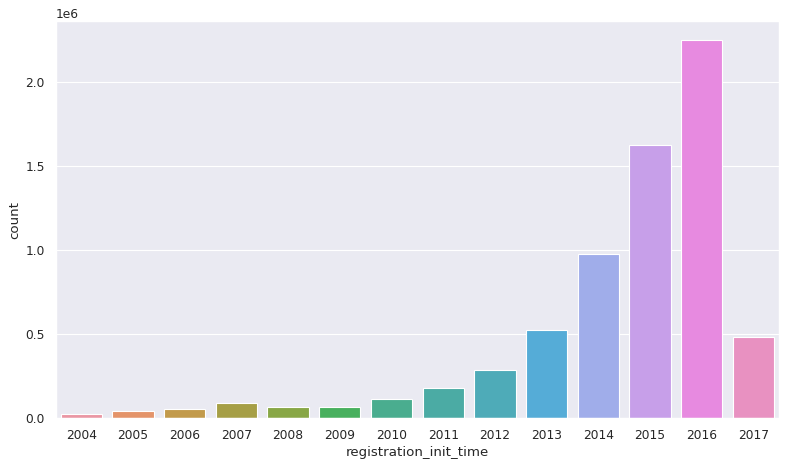

In [ ]:
#To see how the new registrations have increased down the years
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='g')
sns.countplot(members['registration_init_time'].dt.year)
plt.tight_layout()

***2017 users are less, because we have data only for 3 months**

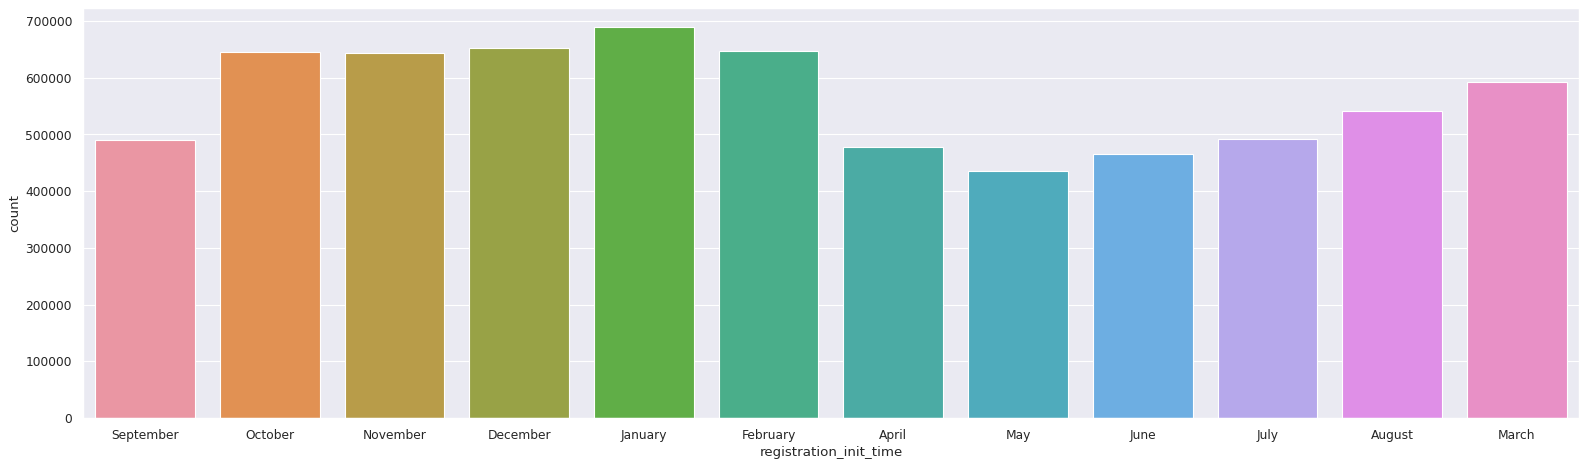

In [ ]:
#Registration of users in different months of the year
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(members['registration_init_time'].dt.month_name())
plt.tight_layout()

**More Users tend to make registration either in ending and starting of year**

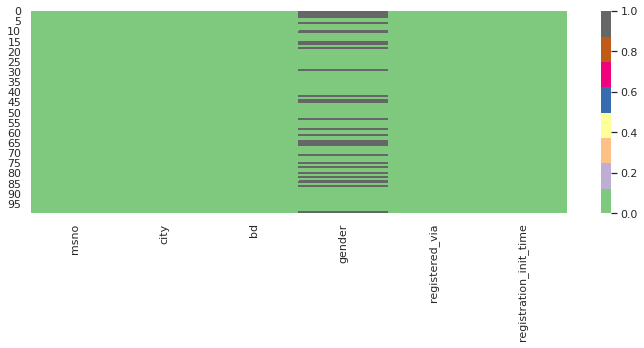

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(members[:100].isnull(),cmap='Accent') # finding Null value
plt.tight_layout()
plt.show()

Here, we can see null values are present only in Gender

***Summary of members data***

*   members data contains 6 columns with shape (6769473,6)
*   There are overall 21 distinct cities and city 1 having highest number of customers
*   Age columns clearly contains outliers, therfore it needs to be rectified
*   Null values are present in gender coulmn, datatype of gender data is string
*   There is 18 distinct registration methods
*   Mostly youngsters are more in number










# **3. Transaction data**

***>>> Lets explore transaction data in depth***

In [ ]:
#Read transaction data
transaction_data = pd.read_csv('/content/drive/MyDrive/KKbox_data/transactions_v2.csv', parse_dates=['transaction_date','membership_expire_date'])

In [ ]:
transaction_data.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0


In [ ]:
transaction_data.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
count,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06
mean,3.791835e+01,6.601770e+01,2.817870e+02,2.813172e+02,7.853025e-01,2.455121e-02
std,4.964805e+00,1.024864e+02,4.351861e+02,4.354200e+02,4.106124e-01,1.547529e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,0.000000e+00
50%,4.000000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,1.000000e+00


In [ ]:
transaction_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
count,1431009.000000,1431009.000000,1431009.000000,1431009.000000,1431009.000000,1431009.000000
mean,37.918355,66.017696,281.787035,281.317241,0.785303,0.024551
std,4.964805,102.486396,435.186138,435.419950,0.410612,0.154753
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,30.000000,99.000000,99.000000,1.000000,0.000000
50%,40.000000,30.000000,149.000000,149.000000,1.000000,0.000000
75%,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000
max,41.000000,450.000000,2000.000000,2000.000000,1.000000,1.000000


**Here we can observe that, plan list price and actual amount paid are almost same, but since the mean values are different, they are not exactly same!**

In [ ]:
pd.DataFrame({'%MissingValues':round((transaction_data.isna().sum()/transaction_data.shape[0])*100,2)})

,%MissingValues
msno,0.0
payment_method_id,0.0
payment_plan_days,0.0
plan_list_price,0.0
actual_amount_paid,0.0
is_auto_renew,0.0
transaction_date,0.0
membership_expire_date,0.0
is_cancel,0.0


**Threre are no NaN or missing values in trasaction data**

In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   msno                    1431009 non-null  object        
 1   payment_method_id       1431009 non-null  int64         
 2   payment_plan_days       1431009 non-null  int64         
 3   plan_list_price         1431009 non-null  int64         
 4   actual_amount_paid      1431009 non-null  int64         
 5   is_auto_renew           1431009 non-null  int64         
 6   transaction_date        1431009 non-null  datetime64[ns]
 7   membership_expire_date  1431009 non-null  datetime64[ns]
 8   is_cancel               1431009 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 98.3+ MB


In [ ]:
transaction_data.shape

(1431009, 9)

***>>>Now lets plot few charts between user counts and different fields in transaction data***

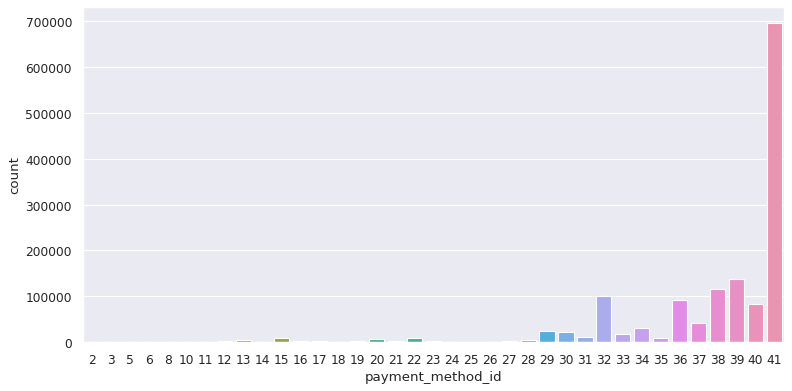

In [ ]:
#payment_method_id
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='g')
sns.countplot(transaction_data['payment_method_id'])
plt.tight_layout()
plt.show()

**41 payment method is more used**

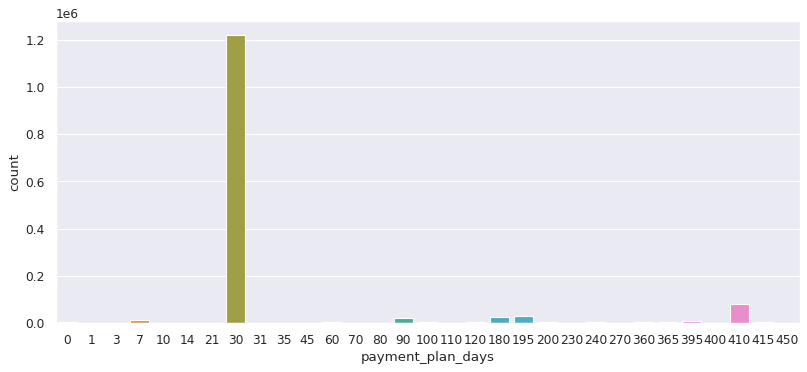

In [ ]:
#payment_plan_days
figure(num=None, figsize=(12,5), dpi=80, facecolor='w', edgecolor='g')
sns.countplot(transaction_data['payment_plan_days'])
plt.show()

**30 days plan seems to highly popular!**

In [ ]:
print('Total number of unique plan list prices ', transaction_data['plan_list_price'].nunique())

Total number of unique plan list prices  48


**There are 48 unique plan list prices**

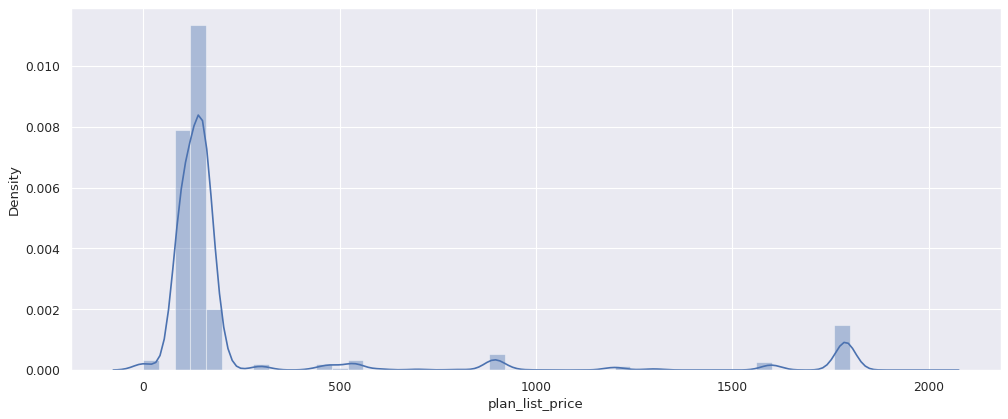

In [ ]:
#plan_list_price
figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='g')
sns.distplot(transaction_data['plan_list_price'])
plt.show()

**Many people tend to choose plan around 180-200, however there are also some people who choose high price plans between 1500-2000! 
Since, actual amount paid and plan list price are almost same, the plot are similar**

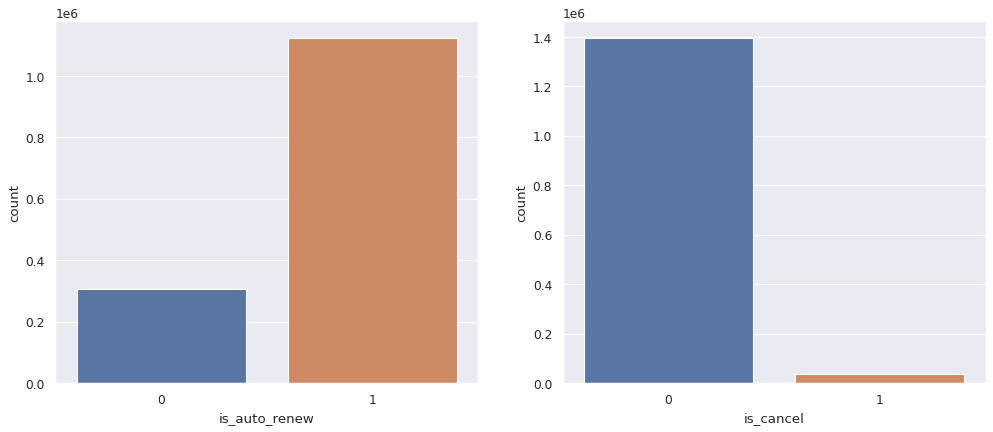

In [ ]:
#is_auto_renew and is_cancel
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='g')
plt.subplot(1,2,1)
sns.countplot(transaction_data['is_auto_renew'])
plt.subplot(1,2,2)
sns.countplot(transaction_data['is_cancel'])
plt.show()

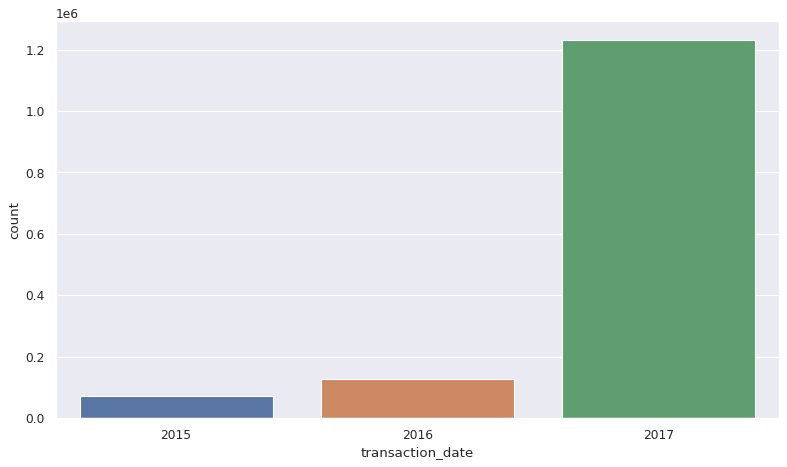

In [ ]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['transaction_date'].dt.year)
plt.tight_layout()

**# We have seen previously that most of the users opted for 30 days plan, and since the given data is mostly in 2017, in the above graph we can observe this pattern**

In [ ]:
transaction_data['membership_expire_date'].dt.month_name().value_counts()

April        1037972
May           142927
March          57106
June           39078
July           27782
August         26938
September      25030
October        18034
November       14913
January        14268
February       13532
December       13429
Name: membership_expire_date, dtype: int64

**The given transaction data is of march month. And since many people have 30 Days plan, we can observe that they have expiry in the month of April**

# **User logs**


In [ ]:
User_logs = pd.read_csv('/content/drive/MyDrive/KKbox_data/user_logs_v2.csv', parse_dates=['date'])

In [ ]:
User_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558


**User logs for the month of March is given**

In [ ]:
User_logs.shape

(18396362, 9)

In [ ]:
User_logs.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000
mean,6.191401,1.508789,0.941376,1.079905,30.282461,29.036146,7904.813556
std,13.428266,3.908539,1.924840,3.518409,42.036412,32.198660,10136.323015
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,1959.944000
50%,2.000000,1.000000,0.000000,0.000000,17.000000,18.000000,4582.990000
75%,7.000000,2.000000,1.000000,1.000000,37.000000,38.000000,9848.441000
max,5639.000000,912.000000,508.000000,1561.000000,41107.000000,4925.000000,9194058.522000


Clearly, there seem to be outliers in the num_25 field


In [ ]:
User_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   msno        object        
 1   date        datetime64[ns]
 2   num_25      int64         
 3   num_50      int64         
 4   num_75      int64         
 5   num_985     int64         
 6   num_100     int64         
 7   num_unq     int64         
 8   total_secs  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 1.2+ GB


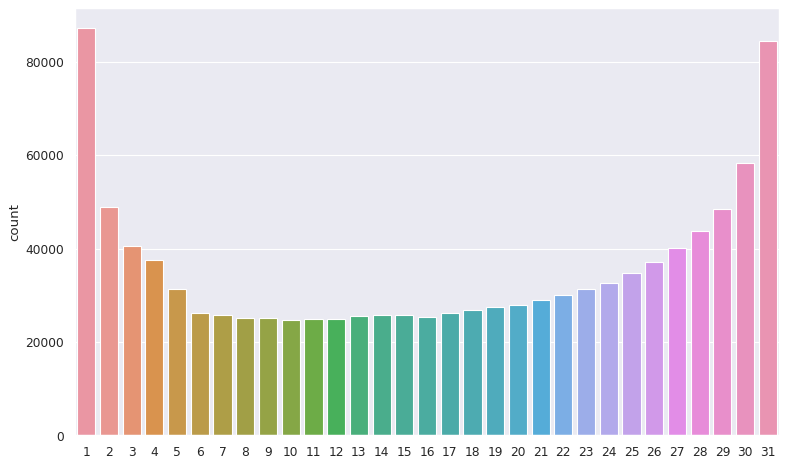

In [ ]:
#To see the amount of log entries for a user 
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(User_logs['msno'].value_counts().values)
plt.tight_layout()
plt.show()

**There are high number of user logs found at the beginning and end of the month**

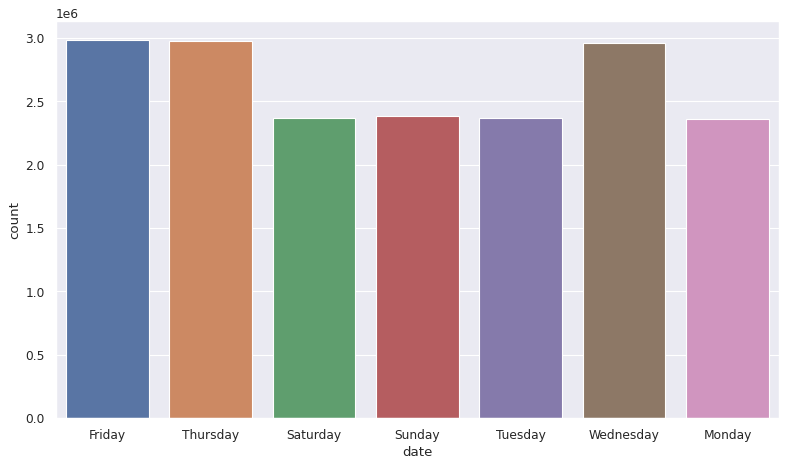

In [ ]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(User_logs['date'].dt.day_name())
plt.tight_layout()

For some users, very less log data is available, whereas for others more log data is available

Basically,the data says
* msno: user id
* Date: format %Y%m%d
* num_25: Number of songs played less than 25% of the song length
* It can be seen that for most of the users, num25 and num100 is high and num50 and num75 is mostly low
* num_50: Number of songs played between 25% to 50% of the song length
* num_75: Number of songs played between 50% to 75% of of the song length
* num_985: Number of songs played between 75% to 98.5% of the song length
* num_100: Number of songs played over 98.5% of the song length
* num_unq: Number of unique songs played
* total_secs: total seconds played

# **Data Analysis against Target Variable**

**Now, lets merge all the datasets to analyse different fields against User churn data**

In [ ]:
#merging members data set with train data set
train_member=pd.merge(train_data,members,how='left',on='msno')


In [ ]:
train_member.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25


[]

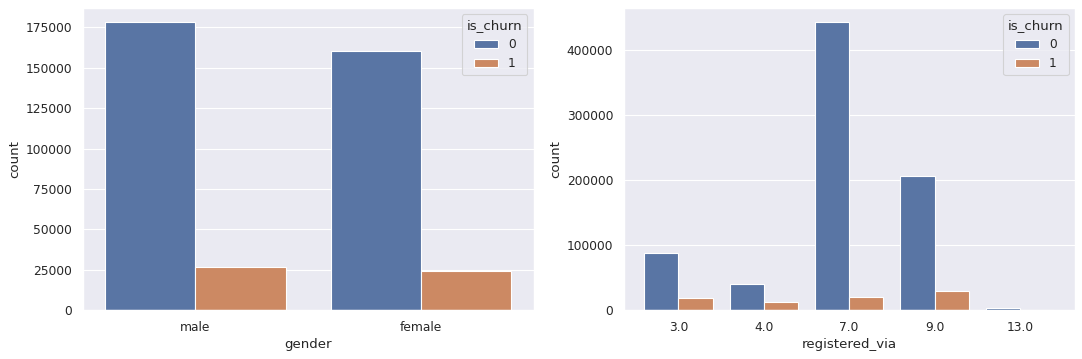

In [ ]:
#Plotting gender and count with respect to churn | registered via and count with respect to churn
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
sns.countplot(data=train_member,x='gender',hue='is_churn')
plt.subplot(1,2,2)
sns.countplot(data=train_member,x='registered_via',hue='is_churn')
plt.plot()

**Here we can notice that, gender does not affect much on customer churn, however we can see that users who registered via method 9 have higher churn stats, we can mark that.**

In [ ]:
# to plot count plot with percentage
def count_plot(data, col1, xname, yname, title, fig, col2='is_churn'):
    '''This function is used to plot a count plot, with percentage displayed on top of each bin'''
    
    # https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w
    plt.figure(figsize=fig)
    ax = sns.countplot(data=data, x=col1, hue=col2, hue_order=[0, 1])
    plt.xticks(size=12)
    plt.xlabel(xname, size=14)
    plt.yticks(size=12)
    plt.ylabel(yname, size=12)
    plt.title(title, size=16)
    
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', size=12)
    plt.tight_layout()
    plt.grid()
    plt.show()

In [ ]:
# to get category wise percentage and total churn
def countplot_analysis(data, col1, xname, yname, title, fig, col2='is_churn', top=False):
    '''This function is used to display a table with the total and average churned users'''
    
    # https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # https://stackoverflow.com/a/19385591/4084039
    temp['total_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(total_users='count')).reset_index()['total_users']
    temp['average_churned_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(average_churned_users='mean')).reset_index()['average_churned_users']
    
    temp.sort_values(by=['total_users'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    count_plot(data, col1, xname, yname, title, fig, col2)
    print(temp)

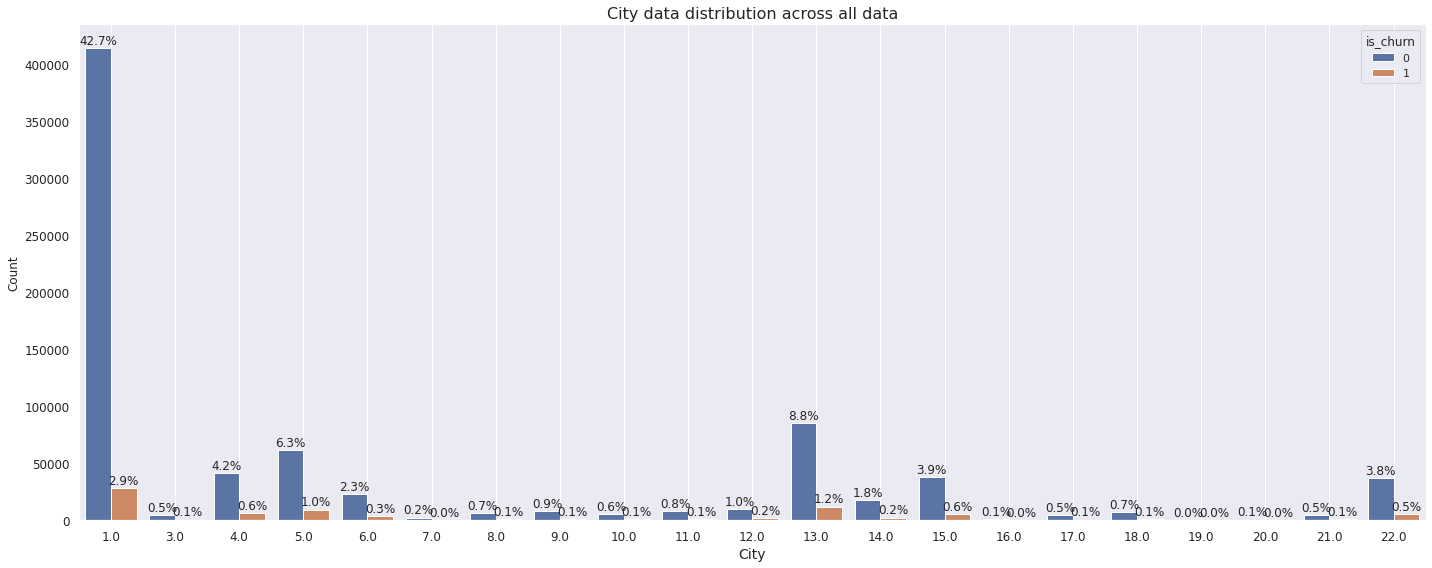

    city  is_churn  total_users  average_churned_users
0    1.0     28351       442598               0.064056
11  13.0     11950        97136               0.123023
3    5.0      9333        70706               0.131997
2    4.0      6094        47227               0.129036
13  15.0      5538        43187               0.128233
20  22.0      5284        41991               0.125836
4    6.0      3358        26066               0.128827
12  14.0      2370        20013               0.118423
10  12.0      1585        11383               0.139243
7    9.0      1200         9526               0.125971
9   11.0      1096         9138               0.119939
16  18.0       913         7792               0.117171
6    8.0      1021         7589               0.134537
8   10.0       858         6470               0.132612
15  17.0       571         5476               0.104273
19  21.0       765         5199               0.147144
1    3.0       672         5057               0.132885
5    7.0  

In [ ]:
countplot_analysis(train_member, 'city', 'City', 'Count', 'City data distribution across all data', (20, 8),'is_churn', False)

Observations: -

* There are a lot of users(almost 45%) from the city 1, but in terms of average churned users for this city is less, as compare to other cities.
* City 21 contains the highest churning rate as compare to other cities, which is 14.71%
* Average churning rate lie in between 10% to 14.7% except for the city 1, which is having average churning rate of 6.4% 

In [ ]:
# merging all 3 data i.e train member and transaction
train_member_transaction=pd.merge(train_member,transaction_data,how='left',on='msno')

In [ ]:
train_member_transaction.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,60.0,0.0,0.0,0.0,2017-03-11,2017-03-14,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,15.0,90.0,300.0,300.0,0.0,2017-03-14,2017-06-15,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-06-08,0.0


In [ ]:
round(train_member_transaction.describe(),2)

,is_churn,city,bd,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
count,1169418.00,1052582.00,1052582.00,1052582.00,1132036.00,1132036.00,1132036.00,1132036.00,1132036.00,1132036.00
mean,0.12,6.26,14.35,6.91,38.88,33.56,145.53,145.02,0.92,0.03
std,0.33,6.54,20.34,1.95,3.88,31.80,133.19,133.34,0.28,0.17
min,0.00,1.00,-3152.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,7.00,38.00,30.00,99.00,99.00,1.00,0.00
50%,0.00,4.00,0.00,7.00,41.00,30.00,149.00,149.00,1.00,0.00
75%,0.00,13.00,28.00,9.00,41.00,30.00,149.00,149.00,1.00,0.00
max,1.00,22.00,2016.00,13.00,41.00,450.00,2000.00,2000.00,1.00,1.00


In [ ]:
#Checking for duplicated values

print(train_member_transaction.shape)
print(train_member_transaction.msno.nunique())

(1169418, 15)
970960


In [ ]:
pd.DataFrame({'%MissingValues':round((train_member_transaction.isna().sum()/train_member_transaction.shape[0])*100,2)})

,%MissingValues
msno,0.00
is_churn,0.00
city,9.99
bd,9.99
gender,57.16
registered_via,9.99
registration_init_time,9.99
payment_method_id,3.20
payment_plan_days,3.20
plan_list_price,3.20


In [ ]:
train_member_transaction.drop(labels=['registration_init_time','transaction_date','membership_expire_date'],axis=1,inplace=True) #removing date fields
train_member_transaction.dropna(inplace=True) #removing null fields
train_member_transaction.sort_values(by='is_churn',inplace=True,ascending=False)
train_member_transaction.reset_index(drop=True,inplace=True)

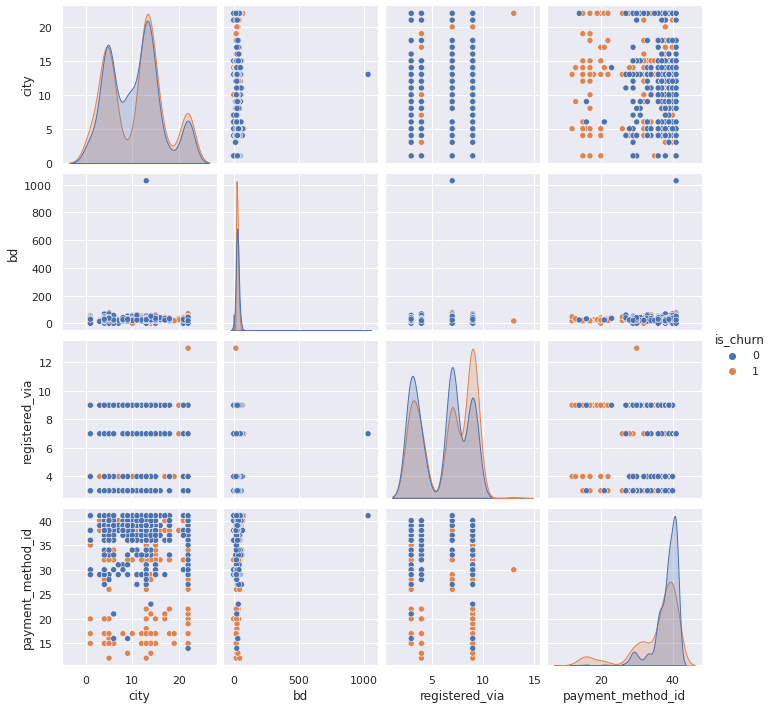

In [ ]:
%matplotlib inline
sns.pairplot(data=train_member_transaction[57380:59380].iloc[:,:7],hue='is_churn')

**Since most of the features overlap, its very difficult to differentiate and draw inferences on our target variable. So, using these features, we need to perform feature engineering in further steps.**

***>>>Next steps will be Feature engineering***